# PC Lab #2 - Group 8 - Bubu, Benedikt, Berkant

## Task #1 : Visualization and 1st step toward the CAPM

Use the PCLab_Data.xlsx to produce scatter plots of each stocks’ daily returns
 against the market daily returns
 • Comment: is there an apparent correlation? Strong? For which stock

In [1]:
# Loading in csv with pandas

import pandas as pd

df = pd.read_csv(r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab1_Stock.csv")

print(df)

'''
Before visualizing the scatter plot, we will calculate again from the stock price data the normalized and
we should calculate the daily returns for each stock. Note, these will be taken from the last PC lab (for more
explanation) We normalize the data to make it easier to compare price changes over time as they will all be on 
the same 100% scale

'''

# Function to normalize the prices
def normalized_price(df):
    
    df = df.set_index('Date')
    initial_price = df.loc['2012-01-12']
    normalized_data = df/initial_price
    normalized_data = normalized_data.reset_index()
    return normalized_data

normalized_data = normalized_price(df)

# Convert the 'Date' column to datetime format and calculate daily returns for each stock and the market (sp500)
normalized_data['Date'] = pd.to_datetime(normalized_data['Date'])

# Calculate daily returns for each stock and the S&P 500 (market returns)
def daily_returns(df):
    # Drop the 'Date' column to perform calculations on stock prices
    df_stocks = df.drop(columns='Date')
    
    # Create a new DataFrame to store the daily returns
    df_daily_returns = pd.DataFrame(index=df.index)

    # Loop through each stock (the columns without 'Date')
    for stock in df_stocks.columns:
        # Empty list
        daily_stock_returns = []

        # Loop though each row belonging to the stock
        for p in range(1, len(df_stocks)):
            price_today = df_stocks[stock].iloc[p]
            price_yesterday = df_stocks[stock].iloc[p-1]
            daily_return = (price_today - price_yesterday)/price_yesterday * 100
            daily_stock_returns.append(daily_return)

        df_daily_returns[stock] = [float('nan')] + daily_stock_returns
    
    # Include the 'Date' column for plotting
    df_daily_returns['Date'] = df['Date']
    
    return df_daily_returns


            Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        s

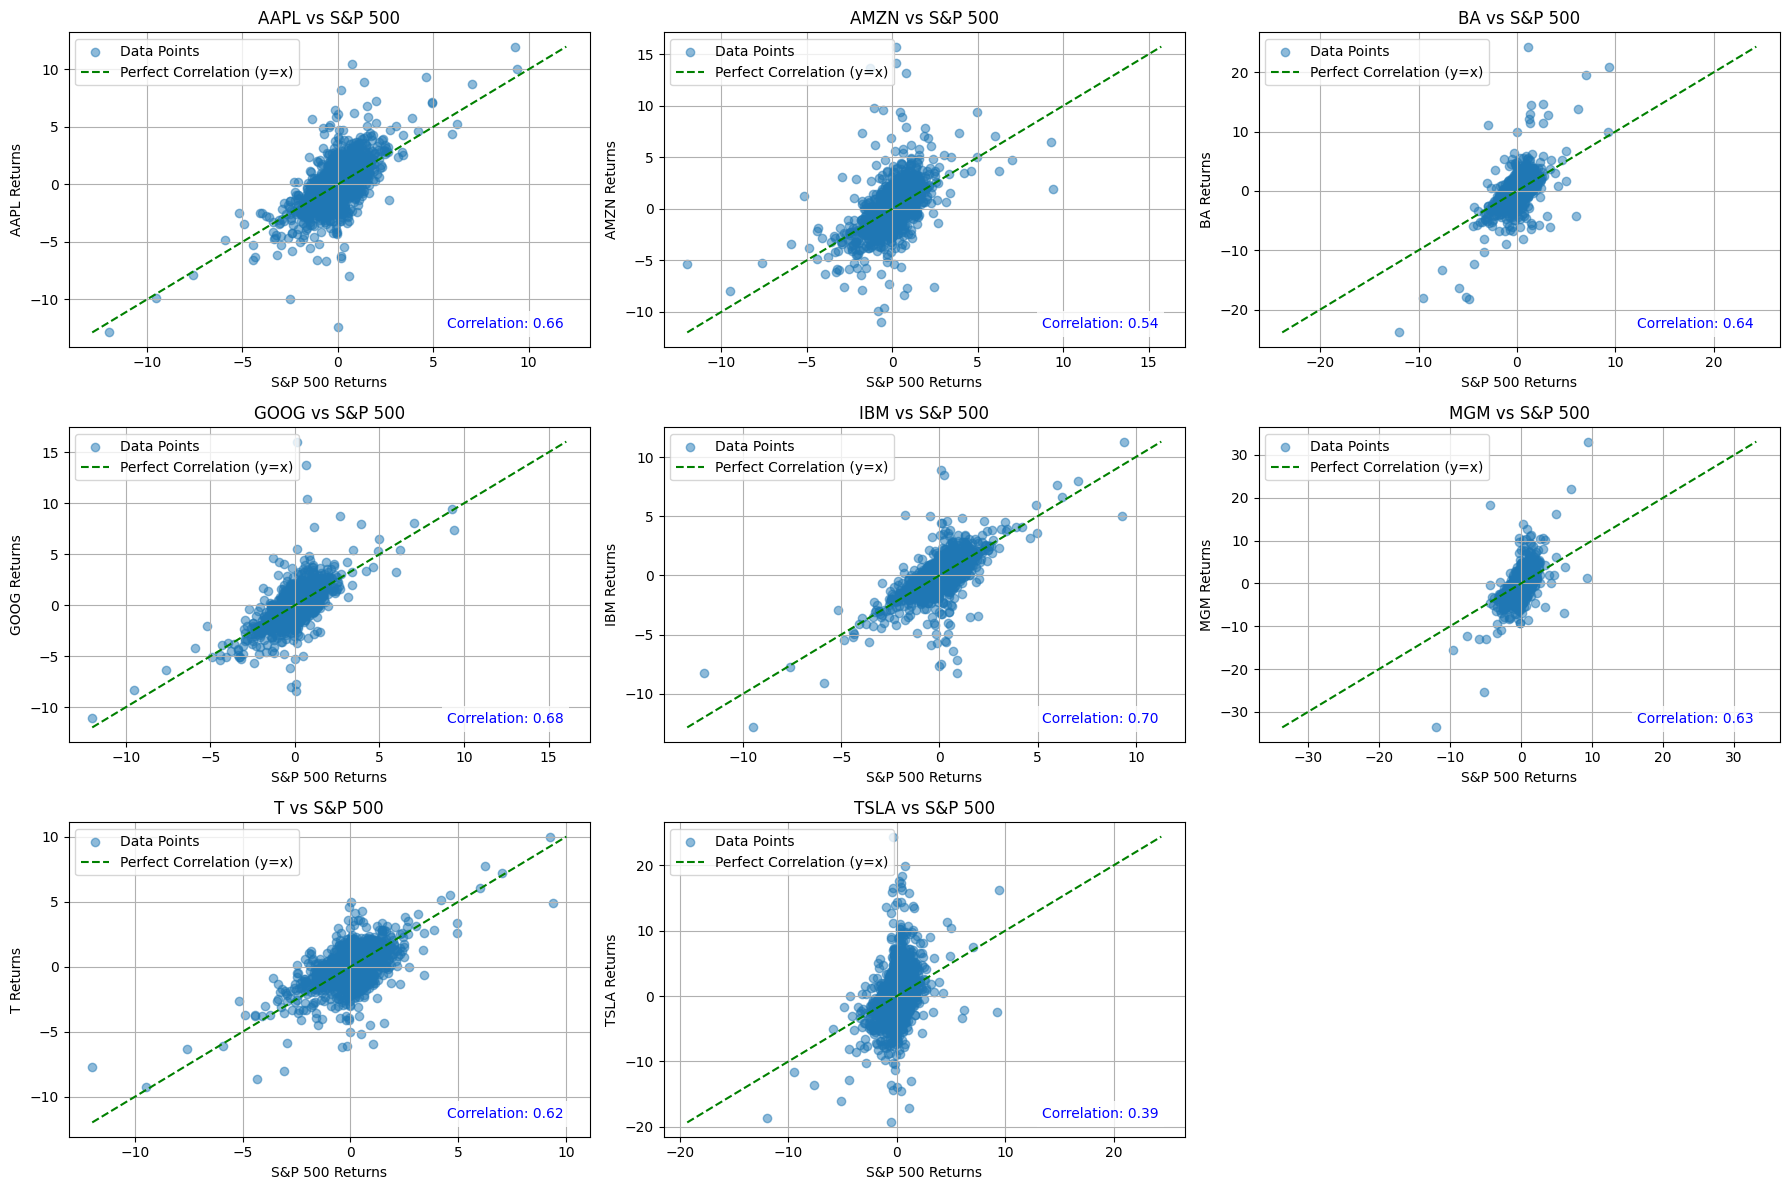

In [2]:
# Ensure date time variable
normalized_data['Date'] = pd.to_datetime(normalized_data['Date'])

# Calculate daily returns using the function based on the normalized data
returns = daily_returns(normalized_data)

# Create a list of the stock columns (exclude 'sp500' (it is the x axis) and 'Date' for plotting)
stock_columns = returns.columns.difference(['Date', 'sp500'])

# Generate scatter plots of each stock's daily returns against the market daily returns
import matplotlib.pyplot as plt
import numpy as np
import math

# define the number of stocks to plot
num_stocks = len(stock_columns)

# Define the number of columns for the subplot grid
num_cols = 3  
num_rows = math.ceil(num_stocks / num_cols)

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))
axes = axes.flatten()

# Create a loop to go through each stock and create a scatter plot with regression line
for i, stock in enumerate(stock_columns):
    # Setting x and y 
    x = returns['sp500']
    y = returns[stock]

    # Ensure both x and y only include non NaN values. 
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]

    # Create the scatter plot óf stock returns against market returns
    axes[i].scatter(x, y, alpha=0.5, label='Data Points')

    # Plot the perfect correlation line (y = x)
    min_val = min(min(x), min(y))  # Determine the minimum value between x and y for the line start
    max_val = max(max(x), max(y))  # Determine the maximum value between x and y for the line end
    axes[i].plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label='Perfect Correlation (y=x)')

    # Calculate and display correlation coefficient
    correlation = np.corrcoef(x, y)[0, 1]

    # Set the correlation text in the bottom-right corner
    axes[i].text(0.95, 0.05, f'Correlation: {correlation:.2f}', 
                transform=axes[i].transAxes, 
                fontsize=10, 
                verticalalignment='bottom', 
                horizontalalignment='right', 
                color='blue', 
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # Set plot labels and title
    axes[i].set_title(f'{stock} vs S&P 500')
    axes[i].set_xlabel('S&P 500 Returns')
    axes[i].set_ylabel(f'{stock} Returns')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')  # Set legend position to top left

# Hide any unused subplots if num_stocks < num_rows * num_cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

When generating the scatter plots, we created a grid of subplots that compare the daily returns of the different stocks against the daily returs of the S&P 500. In the code, we filter out for NaN values and fitted perfect correlation line where y = x to have a better insight into the relationship between the stock and the market. Further, we compute the correlation coefficient. Although the perfect correlation line gives us insight into the direction of the stock against the S&P500, the correlation coefficient tells us how well the points on the scatter plots, i.e., the daily returns fit with the perfect correlation line. this is particularly important when seeing how the stock and market move together. The correlation is displayed in the bottom-right corner of each subplot, while the regression line is plotted in red, and a legend is positioned in the upper left corner for clarity.

Upon visual inspection, based on the correlation line, most stocks have a postiive correlation with the S&P 500 market. This means that stocks in tend to move in the same direction as the S&P500 based on the last 8 years of data, so they react similary. For instance, if S&P 500 increases in value in a given day, the stock will as well. However, to determine how closely do the stocks follow the S&P 500 we look to the correlation value as they measure how closely daily returns fit the regerssion line. This can also be seen by how scattered the plots are. Here, most of the stocks have around a correlation of 0.6 which is relatively strong. The stocks with the strongest correlation to the market is IBM (0.70), Google (0.68) and Apple (0.66) so they react and tend to move inline with the market (S&P 500) trends most closely. This is evidenced by the scatter plots not being as scattered and more densely closer to the line. This means that these stocks are likely to be sensitive to overall market trends and thus they may have higher market risk as they are liekly to be more volatile during market downturns. 

Other stocks such as TSLA has only a correlation of 0.39 which is relatively weakly positively correlated with the market as also indicated with a plot where the daily returns are more scattered than along the line and thus have less market risk. Below we can see the more specific numbers for correlations (not using the numpy)

In [3]:
returns = daily_returns(normalized_data)

# Calculate the correlation between each stock's returns and the market (sp500)
correlations = returns.corr()['sp500'].drop('sp500')

# Display the correlations
correlations

AAPL    0.657320
BA      0.641826
T       0.617463
MGM     0.631449
AMZN    0.539560
IBM     0.703935
TSLA    0.387920
GOOG    0.684571
Date   -0.001759
Name: sp500, dtype: float64

Based on these values, IBM (0.704) and GOOG (0.685) show the strongest correlation with the market, while TSLA (0.388) has the weakest correlation.

## Task #2: Compute alpha and beta

- Apply the CAPM : run an OLS regression of stock i returns on market returns, over the whole period. Assume rf = 0. Are the estimates significant ?
- Plot the beta and alpha for the 8 stocks. Which stock has the highest (lowest) beta and alpha ? Comment !
- Use the observed returns and the predicted ones to compute and plot the histogram of error terms εi for each stock. Comment !
- Your boss wants to take a lot of risk to deliver high return. He asks you to (i) select the 4 riskier assets (over the full period), (ii) form an equally weighted portfolio, and (iii) to estimate the portfolio return based on parameters (β and rm) estimated above.

First let us look at the first part of the assignment, which is to apply tthe CAPM by running an OLS regression of stock returns on market returs over the whole 8 year period. 

In [4]:
# Preparing the data as before
normalized_data['Date'] = pd.to_datetime(normalized_data['Date'])

returns = daily_returns(normalized_data)

print(returns)


          AAPL        BA         T        MGM      AMZN       IBM       TSLA  \
0          NaN       NaN       NaN        NaN       NaN       NaN        NaN   
1    -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869 -19.327430   
2     1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852  16.717854   
3     1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   0.789470   
4    -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752  -0.186494   
...        ...       ...       ...        ...       ...       ...        ...   
2154  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917  -0.133153   
2155  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   0.307062   
2156 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762  -2.475194   
2157  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552  -2.350092   
2158 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220  -3.114399   

          GOOG     sp500       Date  
0

In [5]:
import statsmodels.api as sm

# Assuming the risk-free rate rf = 0 (as per the task)
rf = 0

# Remove the first row with NaN values
returns = returns.dropna()

# Extract S&P 500 returns and stock columns
sp500_returns = returns['sp500']
stock_columns = returns.columns.difference(['Date', 'sp500'])

# Calculate excess returns for stocks and market (sp500)
excess_returns = returns.copy()
for stock in stock_columns:
    excess_returns[stock] = returns[stock] - rf
excess_market_returns = returns['sp500'] - rf

# Lists to store alpha, beta, and p-values
alpha_list = []
beta_list = []
p_values_alpha = []
p_values_beta = []

# Running OLS regression for each stock while calculating alpha, beta and error terms. 

for stock in stock_columns:
    r_M = excess_market_returns
    r_i_excess = excess_returns[stock] 
    
    # Add constant to include alpha in the regression
    r_M = sm.add_constant(r_M)

    # Run OLS regression: r_i = α_i + β_i * r_M + ϵ_i
    model = sm.OLS(r_i_excess, r_M).fit()

    # Store the alpha (intercept) and beta (slope)
    alpha_list.append(model.params.iloc[0])  # α_i (intercept)
    beta_list.append(model.params.iloc[1])   # β_i (slope)
    
    # Store p-values for statistical significance of beta
    p_values_alpha.append(model.pvalues.iloc[0])  # p-value for alpha using iloc
    p_values_beta.append(model.pvalues.iloc[1])   # p-value for beta using iloc
    
# Create a DataFrame to display the results for alpha, beta, and p-values
results = pd.DataFrame({
    'Stock': list(stock_columns),  # Ensure we use the correct stock names
    'Alpha (α_i)': alpha_list,
    'Beta (β_i)': beta_list,
    'p-value Alpha': p_values_alpha,
    'p-value Beta': p_values_beta
})

# Display the results
print("OLS Regression Results:")
print(results)

print("OLS Regression Summary:")
print(model.summary())

OLS Regression Results:
  Stock  Alpha (α_i)  Beta (β_i)  p-value Alpha   p-value Beta
0  AAPL     0.052837    1.112891       0.067202  3.521164e-267
1  AMZN     0.102261    0.991732       0.003512  2.611172e-163
2    BA    -0.002292    1.382867       0.951096  7.299279e-251
3  GOOG     0.033371    1.034881       0.180655  2.345742e-298
4   IBM    -0.053480    0.960416       0.014747  1.185758e-322
5   MGM    -0.016893    1.653568       0.712986  1.874186e-240
6     T    -0.028577    0.744630       0.182942  4.892378e-227
7  TSLA     0.175917    1.268611       0.009920   1.965135e-78
OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     381.9
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          

The code above for running the OLS regression is based on the CAPM equation:

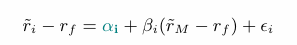

Here, 𝑟𝑖 − 𝑟𝑓 is the excess return of a stock, and 𝑟𝑀−𝑟𝑓 is the excess market return. The regression estimates the stock's alpha (𝛼𝑖) and beta (𝛽𝑖). Alpha represents the stock’s independent performance not explained by the market, while beta measures the stock’s sensitivity to the market. The p-values help assess the significance of these coefficients, and the residuals (𝜖𝑖) represent the part of the stock’s returns unexplained by the market.

In the code, the risk free rate is assumed to be 0, then we calculate the excess returns of each stock: 𝑟𝑖 − 𝑟𝑓 and we also find the excess market return 𝑟𝑀−𝑟𝑓. For each stock, the OLS regression fits the excess stock returns on the excess market returns to estimate alpha (𝛼𝑖) and beta (𝛽𝑖). Alpha represents how much the stock outperforms (or underperforms) independent of the market, while beta measures how sensitive the stock is to market fluctuations. The sm.OLS function is used to compute the regression, and the resulting alpha and beta are stored, along with their p-values (which measure the statistical significance of these estimates).

In CAPM, 𝛼=0 means the asset’s return is exactly what you would expect for its level of market risk (measured by 𝛽). The asset is priced "fairly," so there is no excess return beyond what is explained by its risk relative to the market. According to CAPM theory, all assets should have 𝛼=0, meaning no risk-adjusted abnormal return.

If an asset/stock has α>0, then the asset is generating a return higher than expected based on its risk (market beta). This violates CAPM, and suggests the asset is underpriced or offers excess return. A beta of 1 implies that the asset moves in line with the market: when the market goes up or down by 1%, the stock does as well.

TSLA and AMZN show positive and significant alpha (both 0.175 and 0.102 are <0.05 at a 5% signficance level), indicating outperformance beyond their expected returns. Both assets also have high beta (high systemic risk), suggesting they are more volatile and respond strongly to market changes and both are significant. AAPL also shows positive alpha (0.05) but is insignificant, although it is close to being significant(0.06 < 0.05) It has a beta slightly above 1 (1.11), making it more volatile than the market. Google has a small alpha close to 0 though it is insignificant. The alpha close to 0 suggests that it aligns closely with the market and the beta is slightly above 1. IBM, MGM, T and BA all show negative alphas, though only IBM has a signficant alpha. IBM and T both underperforms slightly as their betas fall under 1, both betas are signficant (less than 0.05). 
MGM and BA on the other hand have high systemic risk. The stock wiht the closest alpha to 0 is BA (-0.002)

Investors looking for excess return (alpha) might consider TSLA and AMZN as they have a much stronger performance. However, they come with higher market risk (beta). Conversely, T and IBM have less risk but underperform relative to market expectations, making them less attractive for a growth-focused portfolio. We can plot out the risks and returns as seen in the code below. 

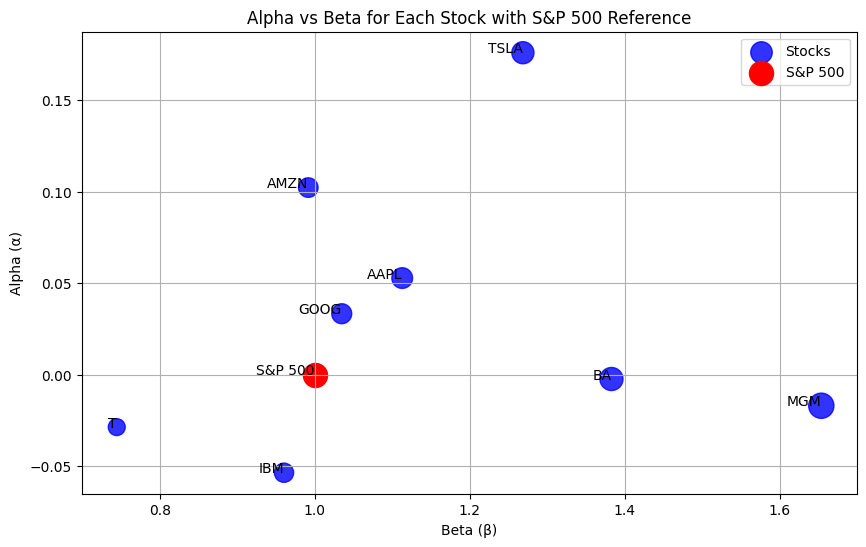

In [6]:
plt.figure(figsize=(10, 6))

# Generate Scatter plot of Alpha and Beta
plt.scatter(results['Beta (β_i)'], results['Alpha (α_i)'],
            # Scale size of points (based on Beta size)
            s=abs(results['Beta (β_i)']) * 200,  
            color='blue', alpha=0.8, label="Stocks")

# Adding stock labels
for i, stock in enumerate(results['Stock']):
    plt.text(results['Beta (β_i)'][i], results['Alpha (α_i)'][i], stock, fontsize=10, ha='right')

# Add S&P 500 (by CAPM, S&P 500 has Beta = 1, Alpha = 0)
plt.scatter(1, 0, color='red', s=300, label="S&P 500")
plt.text(1, 0, 'S&P 500', fontsize=10, ha='right')

# Labels and title
plt.xlabel('Beta (β)')
plt.ylabel('Alpha (α)')
plt.title('Alpha vs Beta for Each Stock with S&P 500 Reference')

# Show plot
plt.grid(True)
plt.legend()
plt.show()


Based on the graph we can see the stock with the highest beta is MGM, followed by BA and TSLA. These are the stocks with the highest systemic risk. This means they fluctuate more with market movements. On the other hand, the stocks with the highest alpha is TSLA followed by AMZN. Indicating high returns. As mentioned before, TSLA is a high-beta stock with significant excess returns, making it appealing to investors that are willing to take on more risk for potentially higher rewards. On the other hand MGM and BA have high betas but very low returns. AMZN, AAPL, and GOOG offer positive alpha with market-level risk or slightly higher, so these are good choices for investors who want more of a balance, moderate growth and not too excessive risk. More risk adverse investors would want stocks like IBM and T with low risk, however, there is also negative returns so it would not really be worth it. 


Now that we have looked at the risk that stems from the market, we should look at risk that cannot be explainied by the market (ei) which is also an essential part of CAPM. Below we calculate the error terms based on predicted returns and then we generate histograms are shown for each stock.

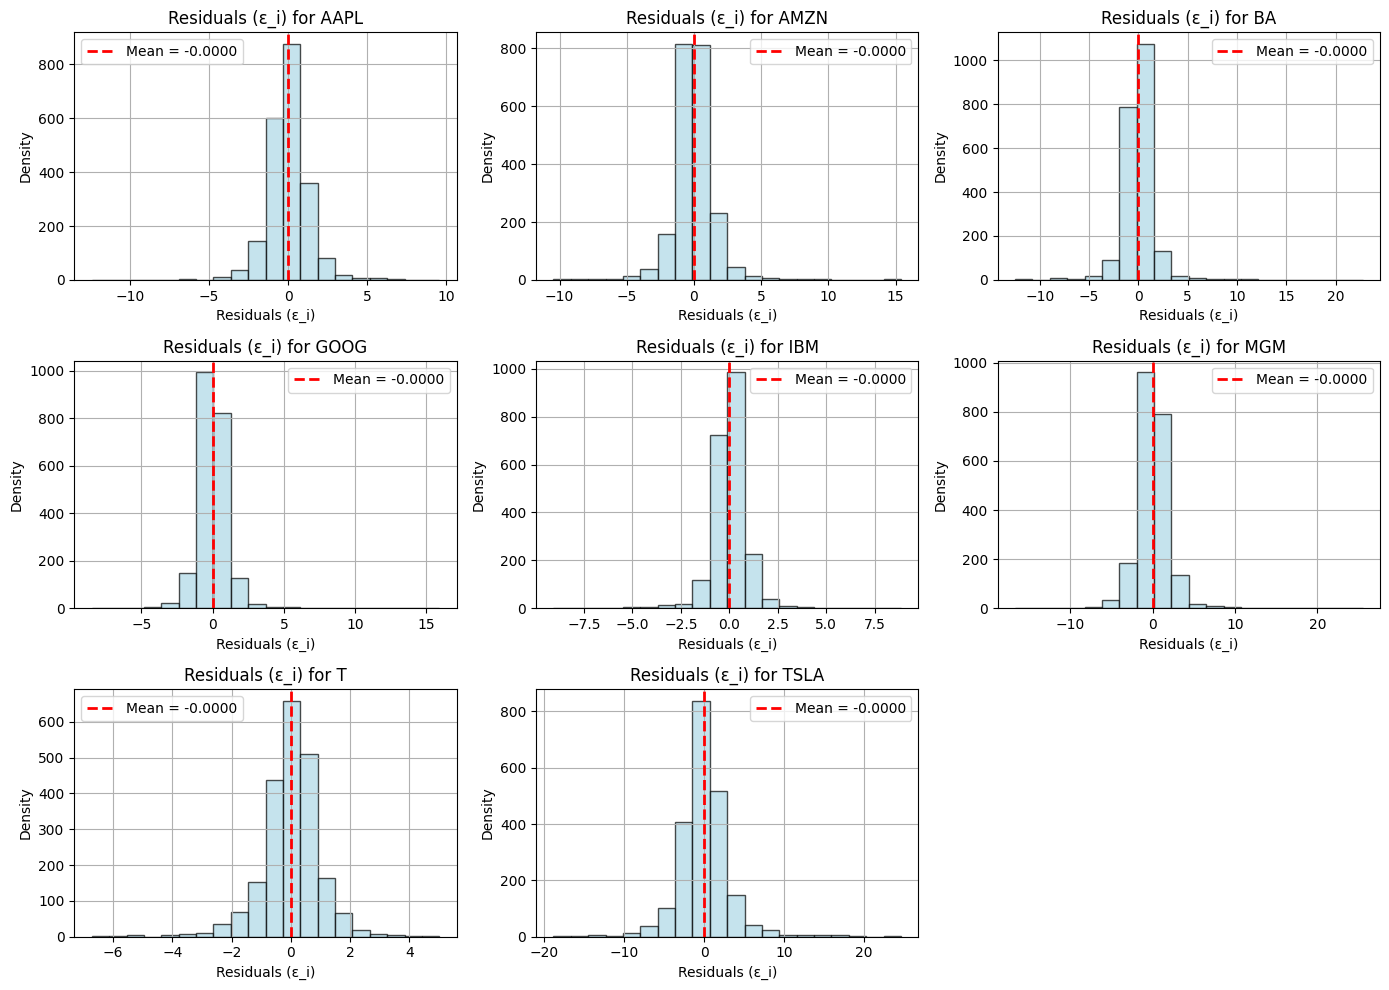

In [7]:
import matplotlib.pyplot as plt

# Compute residuals and plot histograms
residuals = {}

# r_M and r_i have already been identified.
for stock in stock_columns:
    r_M_excess = excess_market_returns
    r_i_excess = excess_returns[stock]

    # Add constant to include alpha in the regression
    r_M_excess = sm.add_constant(r_M_excess)

    # Run OLS regression: (r_i - r_f) = α_i + β_i * (r_M - r_f) + ε_i
    model = sm.OLS(r_i_excess, r_M_excess).fit()

    # Extract the predicted returns
    predicted_returns = model.predict(r_M_excess)

    # Calculate the residuals (error terms ε_i = observed - predicted)
    residuals[stock] = r_i_excess - predicted_returns

# Plot histograms of residuals (error terms) for each stock
plt.figure(figsize=(14, 10))

for i, stock in enumerate(stock_columns):
    plt.subplot(3, 3, i+1)
    
    # Plot histogram of residuals
    plt.hist(residuals[stock], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
    
    # Calculate and plot the mean of the residuals
    mean_residual = residuals[stock].mean()
    plt.axvline(mean_residual, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_residual:.4f}')
    
    # Add title and labels
    plt.title(f'Residuals (ε_i) for {stock}')
    plt.xlabel('Residuals (ε_i)')
    plt.ylabel('Density')
    plt.legend()
    
    # Add grid for easier comparison
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



Looking at the histograms, we can see that AAPL, GOOGL, and IBM have more narrow distributions. This indicates that there is less unexplained risk for these stocks and the market mostly explains the variability. These stocks will more closely follow the market. TSLA, BA and MGM have a wider residual distribution which menas that much of the stocks variability cannot be explained by the market. This makes some sense as in the beginning we saw that there were not such strong correlations to the market with these stocks. This is especially the case for TSLA as also there is rather high risk compared to the market. T and AMZN are somewhere in the middle with a more moderate degree of variability that cannot be explained by the market. 

- Your boss wants to take a lot of risk to deliver high return. He asks you to (i) select the 4 riskier assets (over the full period), (ii) form an equally weighted portfolio, and (iii) to estimate the portfolio return based on parameters (β and rm) estimated above. First lets add the resiudals into the same dataframe:

In [8]:
# Taking the mean residuals of each stock
residuals = {
    'AAPL': residuals['AAPL'].mean(),
    'AMZN': residuals['AMZN'].mean(),
    'BA': residuals['BA'].mean(),
    'GOOG': residuals['GOOG'].mean(),
    'IBM': residuals['IBM'].mean(),
    'MGM': residuals['MGM'].mean(),
    'T': residuals['T'].mean(),
    'TSLA': residuals['TSLA'].mean()
}

# Assign residuals manually by looping over rows
residual_column = []
for stock in results['Stock']:
    residual_column.append(residuals[stock])

# Add the residuals as a new column in the results DataFrame
results['Residual (ϵ_i)'] = residual_column

# Check if residuals have been assigned correctly
print("Results with residuals:")
print(results)

Results with residuals:
  Stock  Alpha (α_i)  Beta (β_i)  p-value Alpha   p-value Beta  Residual (ϵ_i)
0  AAPL     0.052837    1.112891       0.067202  3.521164e-267   -2.403597e-16
1  AMZN     0.102261    0.991732       0.003512  2.611172e-163   -1.300576e-16
2    BA    -0.002292    1.382867       0.951096  7.299279e-251   -8.560756e-17
3  GOOG     0.033371    1.034881       0.180655  2.345742e-298   -2.691699e-16
4   IBM    -0.053480    0.960416       0.014747  1.185758e-322   -1.411702e-16
5   MGM    -0.016893    1.653568       0.712986  1.874186e-240   -2.667005e-16
6     T    -0.028577    0.744630       0.182942  4.892378e-227   -1.119483e-16
7  TSLA     0.175917    1.268611       0.009920   1.965135e-78   -5.268157e-16


In [9]:
# Sort stocks by beta to find the 4 riskiest (highest beta) assets
riskier_assets = results.nlargest(4, 'Beta (β_i)')

print("4 Riskier Assets:")
print(riskier_assets)

4 Riskier Assets:
  Stock  Alpha (α_i)  Beta (β_i)  p-value Alpha   p-value Beta  Residual (ϵ_i)
5   MGM    -0.016893    1.653568       0.712986  1.874186e-240   -2.667005e-16
2    BA    -0.002292    1.382867       0.951096  7.299279e-251   -8.560756e-17
7  TSLA     0.175917    1.268611       0.009920   1.965135e-78   -5.268157e-16
0  AAPL     0.052837    1.112891       0.067202  3.521164e-267   -2.403597e-16


The 4 riskier assets are MGM, BA, TSLA and AAPL as they have the highest beta. However, it should be noted that there are 2 with low returns (alpha) over the full 8 year period. However, for the sake of assuming that riskier assets have the potential to yield higher returns, we stick with these assets. 

In [10]:
# Equal weighting for each selected stock for an equally weighted portfolio
weights = [0.25] * 4  

# Calculate portfolio beta, alpha, and residuals
portfolio_beta = np.dot(weights, riskier_assets['Beta (β_i)'])
portfolio_alpha = np.dot(weights, riskier_assets['Alpha (α_i)'])
portfolio_residual = np.dot(weights, riskier_assets['Residual (ϵ_i)'])

# risk free rate assumed to be 0
rf = 0 

# Estimate the portfolio return based on beta and rm
market_return = returns['sp500'].mean()  # Average market return over the period
portfolio_return = rf + portfolio_beta * (market_return - rf)


In [11]:
print(f"\nPortfolio Beta: {portfolio_beta:.4f}")
print(f"Portfolio Alpha: {portfolio_alpha:.4f}")
print(f"Portfolio Residual: {portfolio_residual:.4f}")
print(f"\nEstimated Portfolio Return: {portfolio_return:.4f}")


Portfolio Beta: 1.3545
Portfolio Alpha: 0.0524
Portfolio Residual: -0.0000

Estimated Portfolio Return: 0.0668


This equally weighter portfolio with the 4 riskiest assets represents a higher-risk, higher-reward strategy. With a beta of 1.35, it carries more risk than the market, but the positive alpha of 0.668 shows that the assets in the portfolio are expected to outperform the market. The nearly zero residual suggests the portfolio returns are explained well by market movements as it follows closely. Thus, there are more systemic risks (beta) than there are stock related risks. This portfolio thus aligns with a strategy focused on high returns through increased risk.

## Task #3 : Testing the CAPM theory

• The goal of this last part is to test the CAPM model predictions
1. For each year : compute βy−1 over 252 business days at the end of each i year y − 1 (OLS regression)
2. At the end or year y, compare the average return of the stock r ̄i (annualized) to the one predicted by the CAPM model rˆM (using βi y measured at y − 1 but the average market return r ̄M measured at y). 3. Generate the scatter plot of the realized returns against the beta or find innovative ways to plot you results.
4. Alternatively, you may use a β computed over longer (shorter) periods of time.
5. Comment your results in the light of yesterday’s lecture : try to give as much economic interpretation as you can !

### Step 1: Calculate Beta for Each Year
This step involves calculating the beta for each stock using an OLS regression for each year. Beta measures the sensitivity of a stock’s returns to the market (S&P 500) returns.

Betas for each year:
          AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
Date                                                                         
2013  1.283028  1.024616  0.616265  1.732747  1.123074  0.856619  1.611417   
2014  0.626566  0.966673  0.784543  1.526288  1.265466  0.765491  1.174505   
2015  0.835490  1.021059  0.564327  1.492332  1.463360  0.729346  1.900735   
2016  1.145075  0.999672  0.721119  1.479366  1.119326  1.019357  1.136643   
2017  1.009962  1.217194  0.476372  1.669338  1.116334  0.931592  1.215942   
2018  1.376087  0.997476  0.762074  1.439209  1.311298  0.664218  1.357621   
2019  1.255214  1.311227  0.659487  1.355182  1.623267  0.967147  1.378808   
2020  1.558167  0.981311  0.577960  1.336059  1.327099  1.075293  1.317051   

          GOOG  sp500  
Date                   
2013  0.860334    1.0  
2014  0.945169    1.0  
2015  1.279824    1.0  
2016  1.084603    1.0  
2017  0.952996    1.0  
2018  1.263186    1.0  
2019  

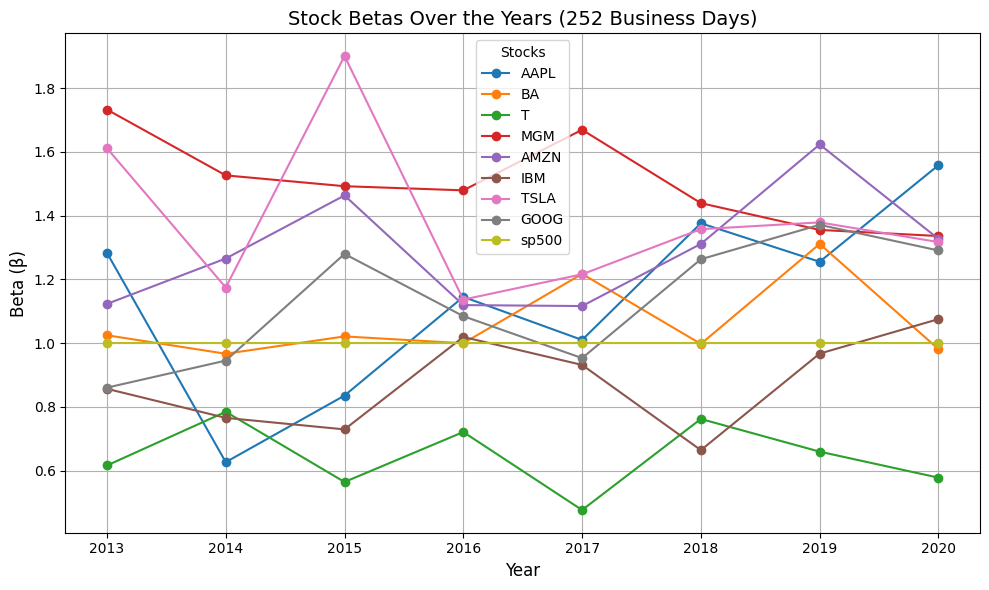

In [21]:
import pandas as pd
import statsmodels.api as sm

# Load data
file_path = r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab1_Stock.csv"
data = pd.read_csv(file_path)

# Convert 'Date' to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Compute daily returns for all stocks and the market (sp500)
returns = data.pct_change().dropna()

# List of stock columns excluding 'sp500' (market)
# stock_columns = returns.columns.difference(['sp500'])
stock_columns = returns

# Function to calculate beta for a given period
def calculate_beta(stock_returns, market_returns):
    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X).fit()
    return model.params.iloc[1]  # Beta using iloc for positional access

# Calculate beta for each stock for the last 252 business days of the previous year
years = returns.index.year.unique()
betas = {}

for stock in stock_columns:
    betas[stock] = []
    for year in years[1:]:  # Start from the second year to calculate βy−1
        # Filter data for the last 252 business days of the previous year
        last_year = year - 1
        last_year_data = returns[returns.index.year == last_year].iloc[-252:]
        
        # Check if there are at least 200 days of data for the last year
        if len(last_year_data) >= 200:  # Allow a minimum of 200 days
            stock_returns = last_year_data[stock]
            market_returns = last_year_data['sp500']
            
            # Calculate beta for the last 252 days of last year (or available data)
            beta = calculate_beta(stock_returns, market_returns)
            betas[stock].append(beta)
        else:
            # If there is not enough data, append NaN or a placeholder
            betas[stock].append(None)

# Create a DataFrame of betas for easy viewing
betas_df = pd.DataFrame(betas, index=years[1:])  # Exclude the first year as it has no βy−1

# Output the calculated beta values as a table
print("Betas for each year:")
print(betas_df)

# Plot the betas for each stock over the years
plt.figure(figsize=(10, 6))
for stock in betas_df.columns:
    plt.plot(betas_df.index, betas_df[stock], marker='o', label=stock)

# Add labels and title
plt.title('Stock Betas Over the Years (252 Business Days)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Beta (β)', fontsize=12)
plt.legend(title="Stocks")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
betas_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00
mean,1.136199,1.064903,0.645268,1.503815,1.293653,0.876133,1.386590,1.130995,1.000000e+00
std,0.301779,0.126971,0.106533,0.139104,0.181502,0.146684,0.255567,0.194358,3.936430e-16
min,0.626566,0.966673,0.476372,1.336059,1.116334,0.664218,1.136643,0.860334,1.000000e+00
25%,0.966344,0.993435,0.574552,1.418202,1.122137,0.756455,1.205583,0.951039,1.000000e+00
50%,1.200145,1.010365,0.637876,1.485849,1.288382,0.894106,1.337336,1.173894,1.000000e+00
75%,1.306293,1.072760,0.731358,1.562050,1.361164,0.980199,1.436960,1.282548,1.000000e+00
max,1.558167,1.311227,0.784543,1.732747,1.623267,1.075293,1.900735,1.371131,1.000000e+00


Note, that when running the code for the betas of the 252 trading days, there were not enough trading days in 2013, 2018 and 2019 and there was a hole in the data. Thus, we check for 200 days as a minimum to get betas for these points.

CAPM assumes that there is a linear relationship between beta (systematic risk) and expected returns. Based on the data over time, we can see that the betas are time variant as they change across the years for each stock. Take Tesla for example. Their beta fluatuates from 1.61 in 2013 to 1.90 in 2015 and down to 1.31 in 2020. Thus, the systemic risk does not remain constant and may be influenced by other factors.

Looking at the numbers we can see that betas were particularly high in 2015 for TSLA, MGM, AMZN and Google all above the market risk (beta = 1). This indicates that these stocks are more volatile thatn the market, TSLA had almsot twice the systematic risk (1.9 > 1). If we look at the means in the describe table, on average BA has the closest betas to the market (around 1) while TSLA, MGM, and AMZN have rather high betas. On the otherhand, T and IBM have very low betas compared to the market as both have on average over the last period less than 1. Based on these, we can assume that stocks with the higher betas will yield more expected returns, in this case TSÆA. MGM and AMZN according to the linear relationships of CAPM. Conversely, stocks with lower betas (T and IBM) will yield lower returns. However, we can see that as the betas are not constant over time, that investors should always reassess predictions per year. 

We also know based on the slides, that there are industry-specific risks that can affect beta. TSLA and GOOGL are tech firms and jhave relatively high betas at certain points. The lines tend to folloiw each other and this may reflect the cyclicality of the auto industry or any technological shocks.

### Step 2: Compare Realized Returns with CAPM-Predicted Returns
In this step, we calculate both the realized (actual) return for each stock and the CAPM-predicted return for each year. The predicted return is based on the beta from the previous year.

Annualized Actual Returns for each year:
          AAPL      AMZN        BA      GOOG       IBM       MGM         T  \
Date                                                                         
2013  0.098603  0.648063  0.852045  0.621176 -0.003371  1.108125  0.055783   
2014  0.409841 -0.179405 -0.029691 -0.038283 -0.131895 -0.047057 -0.034645   
2015 -0.011814  1.298650  0.138809  0.507294 -0.122542  0.144985  0.037628   
2016  0.130707  0.159150  0.108839  0.037573  0.229977  0.336535  0.249523   
2017  0.486148  0.595793  0.928706  0.373615 -0.064549  0.195222 -0.072038   
2018 -0.028950  0.371901  0.149241  0.029629 -0.236680 -0.224135 -0.245903   
2019  0.926652  0.262833  0.053292  0.328825  0.204398  0.419800  0.393245   
2020  1.183638  1.503597 -0.344625  0.296636  0.023578 -0.039208 -0.281008   

          TSLA  
Date            
2013  4.543212  
2014  0.657742  
2015  0.163079  
2016 -0.039751  
2017  0.552829  
2018  0.264594  
2019  0.419371  
2020  9.903519  
Predicte

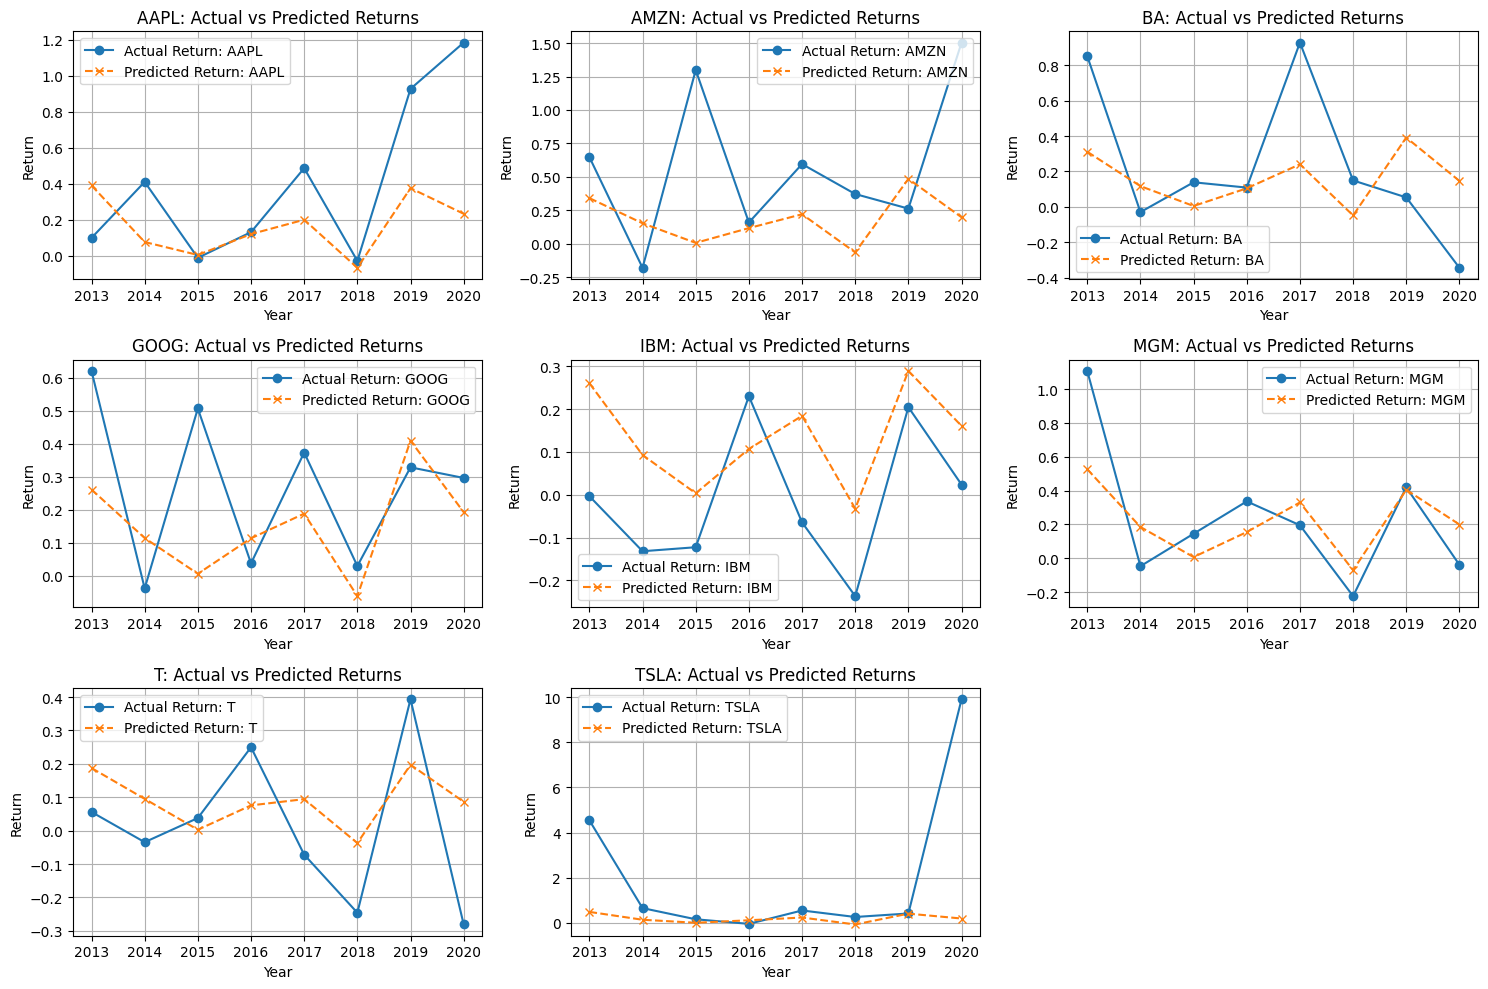

In [23]:
# Constants
RISK_FREE_RATE = 0.0  # Assuming 0 for the risk-free rate unless specified

# Load data
file_path = r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab1_Stock.csv"
data = pd.read_csv(file_path)

# Convert 'Date' to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Compute daily returns for all stocks and the market (sp500)
returns = data.pct_change().dropna()

# List of stock columns excluding 'sp500' (market)
stock_columns = returns.columns.difference(['sp500'])

# Function to calculate beta for a given period
def calculate_beta(stock_returns, market_returns):
    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X).fit()
    return model.params.iloc[1]  # Beta using iloc for positional access

# Function to annualize returns (252 trading days assumed)
def annualize_return(daily_return):
    return (1 + daily_return.mean()) ** 252 - 1

# Calculate beta for each stock for the last 252 business days of the previous year
years = returns.index.year.unique()
betas = {}
annual_returns = {}
predicted_returns = {}

for stock in stock_columns:
    betas[stock] = []
    annual_returns[stock] = []
    predicted_returns[stock] = []
    
    for year in years[1:]:  # Start from the second year to calculate βy−1
        # Filter data for the last 252 business days of the previous year
        last_year = year - 1
        last_year_data = returns[returns.index.year == last_year].iloc[-252:]
        this_year_data = returns[returns.index.year == year]
        
        # Check if there are enough data points
        if len(last_year_data) >= 200 and len(this_year_data) > 0:
            stock_returns = last_year_data[stock]
            market_returns_last_year = last_year_data['sp500']
            market_returns_this_year = this_year_data['sp500']
            
            # Calculate beta for last year (βi at year y-1)
            beta = calculate_beta(stock_returns, market_returns_last_year)
            betas[stock].append(beta)
            
            # Calculate average annualized stock return for year y
            avg_stock_return = annualize_return(this_year_data[stock])
            annual_returns[stock].append(avg_stock_return)
            
            # Calculate average market return for year y
            avg_market_return = annualize_return(market_returns_this_year)
            
            # Calculate predicted return from CAPM using beta from last year
            predicted_return = RISK_FREE_RATE + beta * (avg_market_return - RISK_FREE_RATE)
            predicted_returns[stock].append(predicted_return)
        else:
            # If data is insufficient, append NaN or None
            betas[stock].append(None)
            annual_returns[stock].append(None)
            predicted_returns[stock].append(None)

# Create DataFrames of annual returns and predicted returns for easy viewing
annual_returns_df = pd.DataFrame(annual_returns, index=years[1:])
predicted_returns_df = pd.DataFrame(predicted_returns, index=years[1:])

print("Annualized Actual Returns for each year:")
print(annual_returns_df)

print("Predicted Returns using CAPM for each year:")
print(predicted_returns_df)

# Plot all stocks' actual vs CAPM predicted returns in separate subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 3x3 grid, adjust according to number of stocks

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each stock in a separate subplot
for i, stock in enumerate(stock_columns):
    axes[i].plot(annual_returns_df.index, annual_returns_df[stock], marker='o', label=f'Actual Return: {stock}')
    axes[i].plot(predicted_returns_df.index, predicted_returns_df[stock], marker='x', linestyle='--', label=f'Predicted Return: {stock}')
    
    # Add labels, title, and legend to each subplot
    axes[i].set_title(f'{stock}: Actual vs Predicted Returns')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Return')
    axes[i].legend()
    axes[i].grid(True)

# Remove empty subplot spaces if the number of stocks is less than the grid size
if len(stock_columns) < 9:
    for j in range(len(stock_columns), 9):
        fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

The annualized returns for each stock is given and ploted against the predicted returns for more information. The predicted returns (orange) are derived from the CAPM model in step 1, so it is assumed a linear relationship between beta and returns. On the other hand the actual returns (blue line) are the realized returns for each stock in the respective years. CAPM dictates that if the model is perfect, than the actual returns will closely follow the predicted returns. This is because CAPM assumes alpha = 0 so all returns should be explained by systematic risks. However we can see from the graph that this is not always the case, there are some years that deviate significantly, although they seem to follow similar trends of when the returns go up and down. 

For stocks such as AAPL and GOOG, the predicted returns align relatively well with the actual returns, suggesting that these stocks behave predictably according to the market’s risk-return framework. However, for stocks like TSLA, significant deviations from the predicted returns are evident. TSLA in 2020, for example, there is a huge spike in actual returns, while the CAPM-predicted return are lower. This indicates that Tesla outperformed what the CAPM model would have predicted based solely on its beta and the market's performance thus there must have been influences by company-specific events or perhaps other macroeconomic factors such as covid that is not captured by CAPM.
On the other hand, IBM does more closely align with the predicted returns even during the covid shock in 2019-2020 although this may be due to industry specific reasons as the automobile industry may have been more affected. Here, CAPM does perform better. 
The volatility of actual returns is significant across all stocks, especially for Tesla (TSLA) and Amazon (AMZN). Theses companies are growth-oriented companies and have higher deviations from their predicted CAPM returns, especially in years of market turbulence or company-specific growth spurts.
For MGM and Boeing (BA), the actual returns are often negative in certain years (e.g., MGM in 2014 and Boeing in 2020), but the CAPM predicted returns remain fairly stable. Boeing may have been affected greatly in 2020 due to covid and of course there were barely any flights and travel. This suggests that these companies are subject to industry-specific risks (such as the casino and airline industries) that CAPM does not capture well.

This disparity suggests that while the CAPM model can be helpful, it may underestimate the impact of unique stock-specific drivers, especially in high-growth or speculative stocks.



### Step 3: Generate Scatter Plot 
Now, we will plot a scatter plot to visualize the relationship between realized and CAPM-predicted returns for each stock.

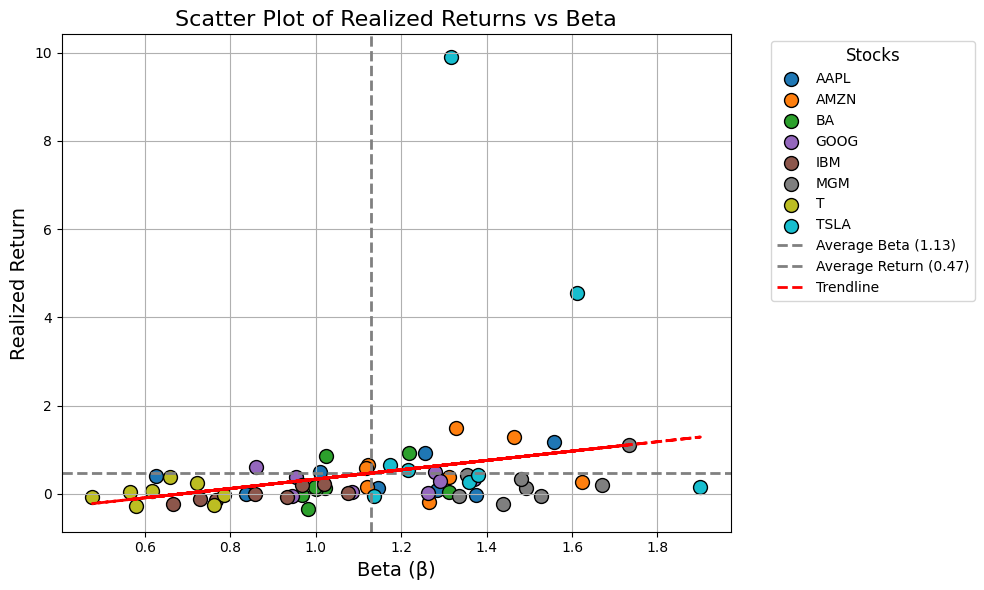

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the data for plotting
beta_values = []
realized_returns = []
stock_labels = []

# Create for loop to loop through stocks
for stock in stock_columns:
    # Loop through each year in the index of the betas_df DataFrame
    for year in betas_df.index:
        # Retrieve the beta value for the given year and stock
        beta = betas_df.loc[year, stock]
        # Retrieve the realized return for the given year and stock
        return_realized = annual_returns_df.loc[year, stock]

        # Check if both the beta and realized return are NOT NaN (missing values). Only proceed if both values are available
        if not np.isnan(beta) and not np.isnan(return_realized):
            # Append the valid beta value to the beta_values list
            beta_values.append(beta)
            # Append the corresponding realized return to the return_realized list
            realized_returns.append(return_realized)
            # Append the stock label to the stock list
            stock_labels.append(stock)

# Unique list of stock names for assigning colors
unique_stocks = list(stock_columns)

# Assign a different color for each stock using a colormap
colors = plt.get_cmap('tab10', len(unique_stocks))  # Use a colormap with distinct colors

# Calculate the average beta and realized return
avg_beta = np.mean(beta_values)
avg_return = np.mean(realized_returns)

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot each stock with a unique color, using circles for all
for i, stock in enumerate(unique_stocks):
    stock_beta_values = [beta_values[j] for j in range(len(stock_labels)) if stock_labels[j] == stock]
    stock_realized_returns = [realized_returns[j] for j in range(len(stock_labels)) if stock_labels[j] == stock]
    
    plt.scatter(stock_beta_values, stock_realized_returns, 
                label=stock, color=colors(i), s=100, edgecolor='black')

# Add labels and title with larger font sizes
plt.title('Scatter Plot of Realized Returns vs Beta', fontsize=16)
plt.xlabel('Beta (β)', fontsize=14)
plt.ylabel('Realized Return', fontsize=14)

# Add vertical line for average beta and horizontal line for average return
plt.axvline(x=avg_beta, color='gray', linestyle='--', label=f'Average Beta ({avg_beta:.2f})', linewidth=2)
plt.axhline(y=avg_return, color='gray', linestyle='--', label=f'Average Return ({avg_return:.2f})', linewidth=2)

# Fit and plot a trendline to show general relationship
z = np.polyfit(beta_values, realized_returns, 1)
p = np.poly1d(z)
plt.plot(beta_values, p(beta_values), "r--", label='Trendline', linewidth=2)

# Add legend for the stocks, placed outside the plot
plt.legend(title="Stocks", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Add a grid for better readability
plt.grid(True)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


The scatter plot of realized returns against beta reveals the general relationship between risk (as measured by beta) and return. According to CAPM theory, higher beta stocks should offer higher returns as compensation for the increased risk. This relationship is depicted by the trendline in the plot, which shows a positive but relatively shallow slope. While the trend confirms the CAPM theory to some extent, there is a lot of variability around the trendline, as previously mentioned indicates tgat factors i.e., macroeconomic or industry-specific factors (idiosyncratic risk) may have a hand in influencing stock returns, not just systematic risk. For instance, TSLA show returns that esignificantly exceeds the predicted CAPM beta, suggesting that factors other than market risk are driving their returns. The average beta (1.13) and average return (0.47) represented by the vertical and horizontal dashed lines respectively and this helps highlight how some tocks deviate a lot. Stocks like TSLA have higher realized returns (1.9 os much higher than average of 1.13) than the average despite not always having the highest beta values. This shows the impact of firm or industry specific factors not captured by CAPM, such as technological innovations or sectoral demand shocks, i.e., demand for electric cars in TSLA's case. 
In contrast, stocks with lower beta values tend to cluster around the lower return range, which aligns with the CAPM expectations.
The scatter plot emphasizes that while beta is a useful indicator of risk, it is not the only determinant of stock returns, and other macroeconomic or industry specific factors can cause deviations from the CAPM-predicted returns.

### Step 4: Experiment with Different Time Periods for Beta Calculation
This step is optional and allows you to adjust the period for beta calculation. You can compute the beta over different time windows (e.g., using 6 months instead of a year).

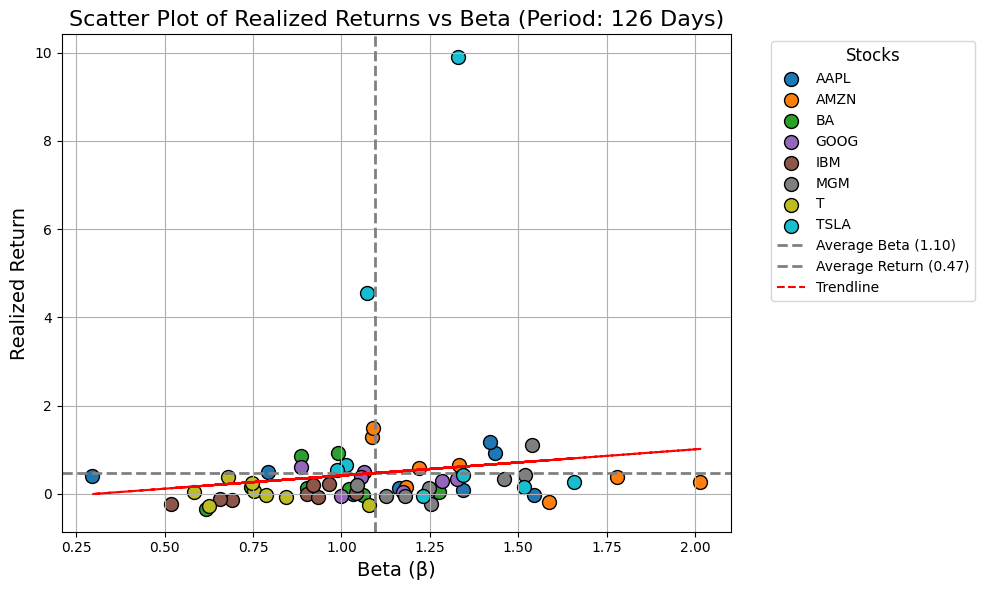

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Set the period to 126 business days for half a year
PERIOD = 126  # Half a year

# Function to calculate beta for a given period
def calculate_beta(stock_returns, market_returns):
    X = sm.add_constant(market_returns)
    model = sm.OLS(stock_returns, X).fit()
    return model.params.iloc[1]  # Beta using iloc for positional access

# Recalculate beta for each stock for the last PERIOD business days of the previous year
betas_shorter_period = {}

for stock in stock_columns:
    betas_shorter_period[stock] = []
    
    for year in years[1:]:  # Start from the second year to calculate βy−1
        # Filter data for the last PERIOD business days of the previous year
        last_year = year - 1
        last_year_data = returns[returns.index.year == last_year].iloc[-PERIOD:]
        
        if len(last_year_data) >= PERIOD:  # Ensure sufficient data
            stock_returns = last_year_data[stock]
            market_returns = last_year_data['sp500']
            
            # Calculate beta for the last PERIOD days of the previous year
            beta = calculate_beta(stock_returns, market_returns)
            betas_shorter_period[stock].append(beta)
        else:
            betas_shorter_period[stock].append(None)

# Create DataFrame for the recalculated betas
betas_shorter_period_df = pd.DataFrame(betas_shorter_period, index=years[1:])

# Flatten the beta and return data for plotting
beta_values_shorter_period = []
realized_returns = []
stock_labels = []

for stock in stock_columns:
    for year in betas_shorter_period_df.index:
        beta = betas_shorter_period_df.loc[year, stock]
        return_realized = annual_returns_df.loc[year, stock]
        
        # Check for None or NaN values
        if beta is not None and return_realized is not None:
            if not np.isnan(beta) and not np.isnan(return_realized):
                beta_values_shorter_period.append(beta)
                realized_returns.append(return_realized)
                stock_labels.append(stock)

# Calculate the average beta and realized return
avg_beta = np.mean(beta_values_shorter_period)
avg_return = np.mean(realized_returns)

# Create a scatter plot using the new betas
plt.figure(figsize=(10, 6))

# Plot each stock with a unique color using circles for all
unique_stocks = list(stock_columns)
colors = plt.get_cmap('tab10', len(unique_stocks))  # Use a colormap with distinct colors

for i, stock in enumerate(unique_stocks):
    stock_beta_values = [beta_values_shorter_period[j] for j in range(len(stock_labels)) if stock_labels[j] == stock]
    stock_realized_returns = [realized_returns[j] for j in range(len(stock_labels)) if stock_labels[j] == stock]
    
    plt.scatter(stock_beta_values, stock_realized_returns, 
                label=stock, color=colors(i), s=100, edgecolor='black')

# Add labels and title with larger font sizes
plt.title(f'Scatter Plot of Realized Returns vs Beta (Period: {PERIOD} Days)', fontsize=16)
plt.xlabel('Beta (β)', fontsize=14)
plt.ylabel('Realized Return', fontsize=14)

# Add vertical line for average beta and horizontal line for average return
plt.axvline(x=avg_beta, color='gray', linestyle='--', label=f'Average Beta ({avg_beta:.2f})', linewidth=2)
plt.axhline(y=avg_return, color='gray', linestyle='--', label=f'Average Return ({avg_return:.2f})', linewidth=2)

# Fit and plot a trendline to show general relationship
if len(beta_values_shorter_period) > 1 and len(realized_returns) > 1:
    z = np.polyfit(beta_values_shorter_period, realized_returns, 1)
    p = np.poly1d(z)
    plt.plot(beta_values_shorter_period, p(beta_values_shorter_period), "r--", label='Trendline')

# Add legend for the stocks, placed outside the plot
plt.legend(title="Stocks", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)

# Add a grid for better readability
plt.grid(True)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

After reducing the period down to 126 days, we can see that there are some similar results. There is again a positive trendline so it confirmns the CAPM assumption that higher risk = higher returns. tjhe average beeta is slightly lower (1.10 < 1.13) however, in general the same holds true as with the full trading year. The lower average indicates that on average, the selected stocks exhibited slightly less sensitivity to the market over this shorter time period. The average return is still around 0.47, which aligns with the previous analysis. 
Stocks like TSLA, AMZN, and AAPL are closer to the average beta compared to the full-year analysis, suggesting that their systematic risk fluctuates more over shorter periods.
The trendline is slighty more flat here than in the full-year plot, suggesting that beta alone is not sufficient to explain returns, especially in shorter time frames. Factors like market noise, short-term shocks, or investor sentiment may have more influence in the shorter term.


To better compare the results lets compare each individual beta

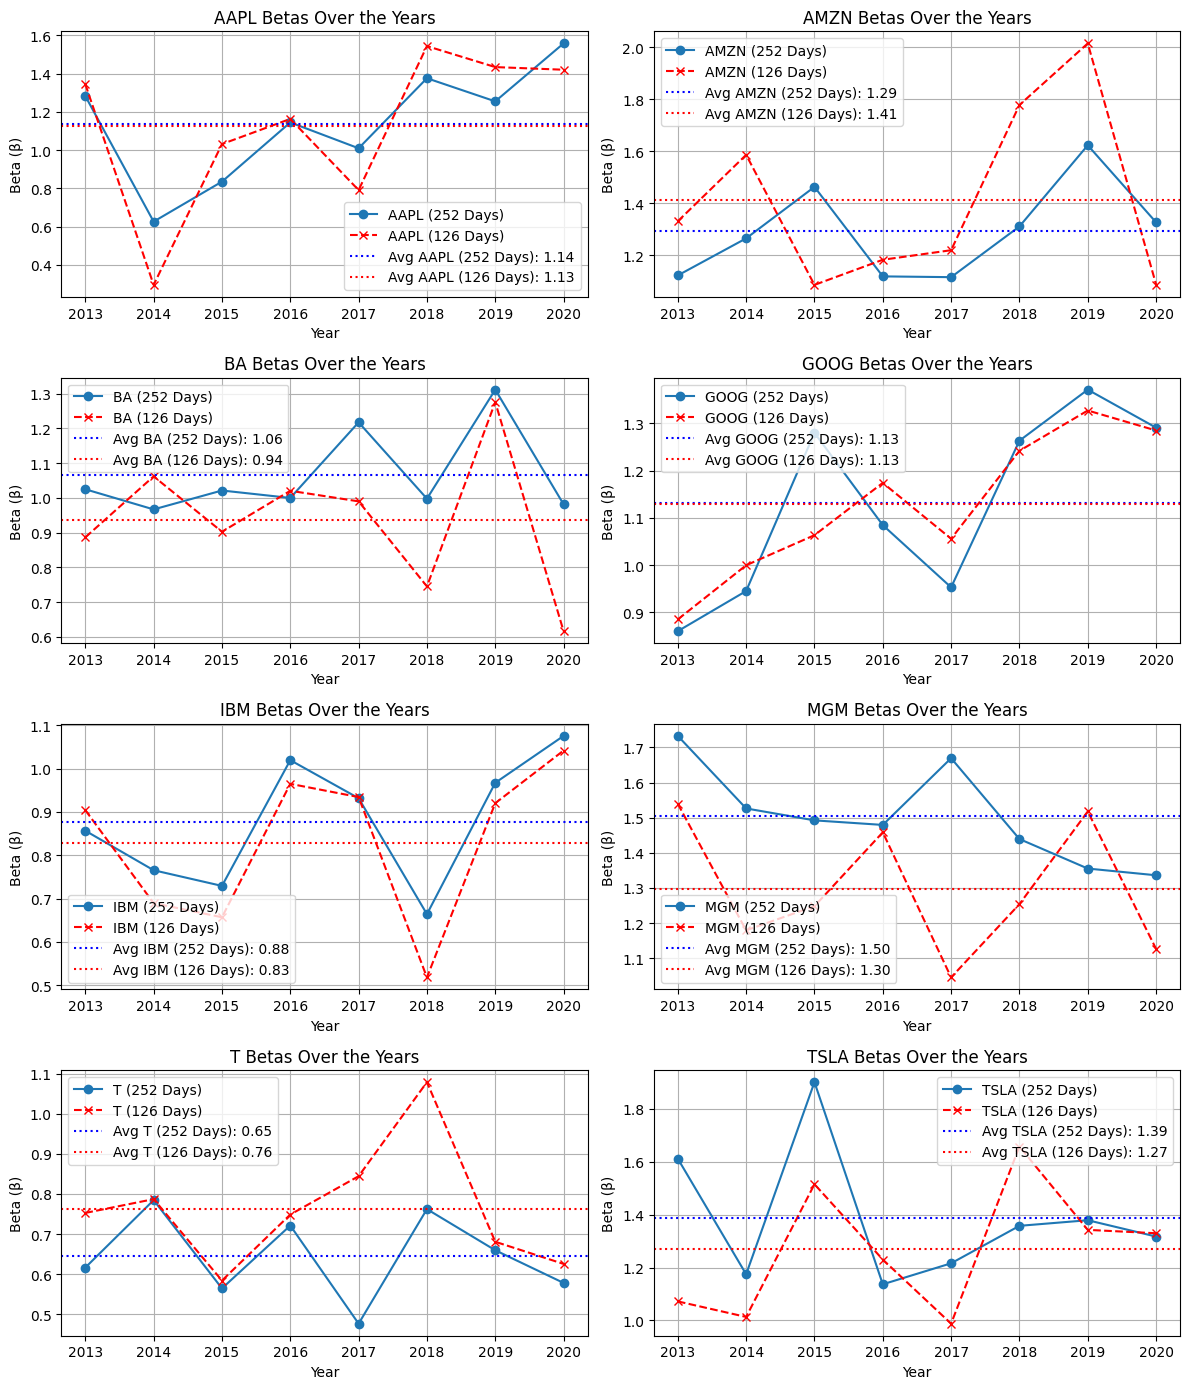

In [26]:
# Remove 'sp500' from the stock columns if it's present
stock_columns = betas_df.columns.difference(['sp500'])

# Number of stocks and figure layout setup
num_stocks = len(stock_columns)
fig, axes = plt.subplots(nrows=num_stocks//2 + num_stocks%2, ncols=2, figsize=(12, 14))  # Adjust layout

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot betas for each stock in a separate subplot
for i, stock in enumerate(stock_columns):
    # Get from the 252 days calculation
    axes[i].plot(betas_df.index, betas_df[stock], marker='o', label=f'{stock} (252 Days)')
    # Get from the 126 day period calculation
    axes[i].plot(betas_shorter_period_df.index, betas_shorter_period_df[stock], marker='x', linestyle='--', label=f'{stock} (126 Days)', color='red')
    
    # Calculate average betas for 252 days and 126 days
    avg_beta_252 = betas_df[stock].mean()
    avg_beta_126 = betas_shorter_period_df[stock].mean()
    
    # Add horizontal dashed lines for the average beta
    axes[i].axhline(y=avg_beta_252, color='blue', linestyle=':', label=f'Avg {stock} (252 Days): {avg_beta_252:.2f}')
    axes[i].axhline(y=avg_beta_126, color='red', linestyle=':', label=f'Avg {stock} (126 Days): {avg_beta_126:.2f}')
    
    # Add labels and title
    axes[i].set_title(f'{stock} Betas Over the Years', fontsize=12)
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Beta (β)', fontsize=10)
    axes[i].grid(True)
    axes[i].legend()

# Hide any unused subplots (if odd number of stocks)
for ax in axes[len(stock_columns):]:
    ax.set_visible(False)

# Add tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



 Looking at each of the average betas individually, we see that the beta tends to in general follow the same  pattern. IBM is verys similar however, in the shorter period there seems to be a mix of whether beta values are higher or lower. However, the volatility looks much higher for the shorter 126 day beta as there is more fluctuation. This may be due to the introduction of more noise. This a longer period provides a better measyre of systematic risk. The higher variability in betas in the longer period suggests that beta estimates become more accurate over time, smoothing out short-term noise.
 As before, stocks such as TSLA, MGM, and AMZN, have consistently higher betas, reflecting their idiosyncratic risk perhaps related to the industry. 

 This comparison suggests that while CAPM may hold over longer periods, its predictions become less reliable in shorter timeframes, where idiosyncratic risks and short-term volatility play a larger role. however, in general in terms of CAPM ability to predict furture portfolio returns, we have clearly seen although the patterns may fall in line, there are still many indsutry-specific or macroeconomic factors that come into play and that for firms that have these risks CAPM may not always hold to be true.

### Step 5: Comment on the Results
Note that the results were commented on throughout the code